In [179]:

# Library to suppress warnings or deprecation notes
import warnings
warnings.filterwarnings("ignore")

# Importing Libraries to help with reading data (tabular and numerical)

import pandas as pd
import numpy as np

# Importing Libraries to perform statistical analysis
import scipy.stats as stats
import sklearn

# Importing Library to split data
from sklearn.model_selection import train_test_split

# Importing libraries to help with data visualization 
import matplotlib.pyplot as plt
import seaborn as sns

# Removing the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# statemodels
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

# Importing library To build logistic regression model
from sklearn.linear_model import LogisticRegression

# Importing libraries To get diferent metric scores
from sklearn import metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

# Importing Library to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Importing Library to import different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

# Importing library To tune different models
from sklearn.model_selection import GridSearchCV




## *Importing Dataset*

In [180]:
# Loading the survey into notebook
mydata = pd.read_csv('D:\survey.csv')

In [181]:
# Checking the dimensions of the dataset
mydata.shape

(1259, 27)

In [182]:
# Taking a peek at the first five entries in the dataset
mydata.head(20)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,8/27/2014 11:29,37,Female,United States,IL,NaN,No,Yes,Often,25-Jun,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,8/27/2014 11:29,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,8/27/2014 11:29,32,Male,Canada,NaN,NaN,No,No,Rarely,25-Jun,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,8/27/2014 11:29,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,8/27/2014 11:30,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
5,8/27/2014 11:31,33,Male,United States,TN,NaN,Yes,No,Sometimes,25-Jun,No,Yes,Yes,Not sure,No,Don't know,Don't know,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,NaN
6,8/27/2014 11:31,35,Female,United States,MI,NaN,Yes,Yes,Sometimes,5-Jan,Yes,Yes,No,No,No,No,No,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No,NaN
7,8/27/2014 11:32,39,M,Canada,NaN,NaN,No,No,Never,5-Jan,Yes,Yes,No,Yes,No,No,Yes,Don't know,No,No,No,No,No,No,No,No,NaN
8,8/27/2014 11:32,42,Female,United States,IL,NaN,Yes,Yes,Sometimes,100-500,No,Yes,Yes,Yes,No,No,No,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No,NaN
9,8/27/2014 11:32,23,Male,Canada,NaN,NaN,No,No,Never,26-100,No,Yes,Don't know,No,Don't know,Don't know,Don't know,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No,NaN


## *Data Pre-processing*

### Missing Values Detection and Remdiation

In [183]:
# Checking if there are missing values
mydata.isna().apply(pd.value_counts).T

,False,True
Timestamp,1259.0,NaN
Age,1259.0,NaN
Gender,1259.0,NaN
Country,1259.0,NaN
state,744.0,515.0
self_employed,1241.0,18.0
family_history,1259.0,NaN
treatment,1259.0,NaN
work_interfere,995.0,264.0
no_employees,1259.0,NaN


In [184]:
# Checking data types of each attribute
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [185]:
mhdata.duplicated().any()

True

In [186]:
mydata.duplicated().any()

True

In [187]:
# Removing unnecessary columns that are not required for exploratory data analysis (EDA) and modeling 
mydata.drop(columns=['Timestamp', 'Country', 'state', 'comments'], inplace = True)

In [188]:
# Changing column names to create consistency and enhance comprehension
mydata.rename({'self_employed' : 'Self_Employed', 'family_history' : 'Family_History', 
           'treatment' : 'Treatment', 'work_interfere' : 'Work_Interfere', 
           'no_employees': 'Employee_Count_Company', 'remote_work': 'Remote_Work', 'tech_company': 'Tech_Company', 
           'benefits': 'Benefits', 'care_options': 'Care_Options', 'wellness_program': 'Wellness_Program', 
           'seek_help': 'Seek_Help', 'anonymity': 'Anonymity', 'leave': 'Medical_Leave', 
           'mental_health_consequence': 'Mental_Health_Consequence', 
           'phys_health_consequence': 'Physical_Health_Consequence', 'coworkers': 'Coworkers_Reach', 
           'supervisor': 'Supervisor_Reach', 'mental_health_interview': 'Mental_Health_Interview', 
           'phys_health_interview': 'Physical_Health_Interview', 'mental_vs_physical': 'Mental_VS_Physical', 
           'obs_consequence': 'Observed_Consequence_Workplace'} , inplace = True , axis = 1)

In [189]:
# Checking the entries for age
mydata['Age'].unique()

array([         37,          44,          32,          31,          33,
                35,          39,          42,          23,          29,
                36,          27,          46,          41,          34,
                30,          40,          38,          50,          24,
                18,          28,          26,          22,          19,
                25,          45,          21,         -29,          43,
                56,          60,          54,         329,          55,
       99999999999,          48,          20,          57,          58,
                47,          62,          51,          65,          49,
             -1726,           5,          53,          61,           8,
                11,          -1,          72], dtype=int64)

In [190]:
# calculating the median age
median_age = mydata['Age'].median()
print(median_age)

31.0


In [191]:
# replacing impossible values with the median age
mydata['Age'].replace([mydata['Age'][mydata['Age'] < 15]], median_age, inplace = True)
mydata['Age'].replace([mydata['Age'][mydata['Age'] > 100]], median_age, inplace = True)

mydata['Age'].unique()

array([37, 44, 32, 31, 33, 35, 39, 42, 23, 29, 36, 27, 46, 41, 34, 30, 40,
       38, 50, 24, 18, 28, 26, 22, 19, 25, 45, 21, 43, 56, 60, 54, 55, 48,
       20, 57, 58, 47, 62, 51, 65, 49, 53, 61, 72], dtype=int64)

In [192]:
# Checking the entries for gender
mydata['Gender'].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [193]:
# Analysis to three categories
mydata['Gender'].replace(['Male ', 'male', 'M', 'm', 'Male', 'Cis Male',
                     'Man', 'cis male', 'Mail', 'Male-ish', 'Male (CIS)',
                      'Cis Man', 'msle', 'Malr', 'Mal', 'maile', 'Make',], 'Male', inplace = True)

mydata['Gender'].replace(['Female ', 'female', 'F', 'f', 'Woman', 'Female',
                     'femail', 'Cis Female', 'cis-female/femme', 'Femake', 'Female (cis)',
                     'woman',], 'Female', inplace = True)

mydata["Gender"].replace(['Female (trans)', 'queer/she/they', 'non-binary',
                     'fluid', 'queer', 'Androgyne', 'Trans-female', 'male leaning androgynous',
                      'Agender', 'A little about you', 'Nah', 'All',
                      'ostensibly male, unsure what that really means',
                      'Genderqueer', 'Enby', 'p', 'Neuter', 'something kinda male?',
                      'Guy (-ish) ^_^', 'Trans woman',], 'Queer', inplace = True)

In [194]:
mydata['Gender'].value_counts()

Male      991
Female    247
Queer      21
Name: Gender, dtype: int64

In [195]:
# Limiting answers to boolean-like values
columns_to_print = ['Self_Employed', 'Family_History','Treatment', 'Work_Interfere', 'Employee_Count_Company', 'Remote_Work',
                    'Tech_Company', 'Benefits', 'Care_Options', 'Wellness_Program',
                    'Seek_Help', 'Anonymity', 'Medical_Leave', 'Mental_Health_Consequence',
                    'Physical_Health_Consequence', 'Coworkers_Reach', 'Supervisor_Reach',
                    'Mental_Health_Interview', 'Physical_Health_Interview', 'Mental_VS_Physical',
                    'Observed_Consequence_Workplace']

for column in columns_to_print:
    print(f"{column}:")
    print(mydata[column].value_counts())
    print()

Self_Employed:
No     1095
Yes     146
Name: Self_Employed, dtype: int64

Family_History:
No     767
Yes    492
Name: Family_History, dtype: int64

Treatment:
Yes    637
No     622
Name: Treatment, dtype: int64

Work_Interfere:
Sometimes    465
Never        213
Rarely       173
Often        144
Name: Work_Interfere, dtype: int64

Employee_Count_Company:
25-Jun            290
26-100            289
More than 1000    282
100-500           176
5-Jan             162
500-1000           60
Name: Employee_Count_Company, dtype: int64

Remote_Work:
No     883
Yes    376
Name: Remote_Work, dtype: int64

Tech_Company:
Yes    1031
No      228
Name: Tech_Company, dtype: int64

Benefits:
Yes           477
Don't know    408
No            374
Name: Benefits, dtype: int64

Care_Options:
No          501
Yes         444
Not sure    314
Name: Care_Options, dtype: int64

Wellness_Program:
No            842
Yes           229
Don't know    188
Name: Wellness_Program, dtype: int64

Seek_Help:
No            646

In [196]:
mydata['Treatment'] = np.where(mydata['Treatment'] == 'Yes', 1, 0)

In [197]:
mydata.sample(10)

,Age,Gender,Self_Employed,Family_History,Treatment,Work_Interfere,Employee_Count_Company,Remote_Work,Tech_Company,Benefits,Care_Options,Wellness_Program,Seek_Help,Anonymity,Medical_Leave,Mental_Health_Consequence,Physical_Health_Consequence,Coworkers_Reach,Supervisor_Reach,Mental_Health_Interview,Physical_Health_Interview,Mental_VS_Physical,Observed_Consequence_Workplace
118,18,Male,No,No,1,Rarely,5-Jan,Yes,Yes,No,No,No,No,Yes,Very easy,No,No,Some of them,No,No,No,Don't know,No
749,19,Male,No,No,1,Sometimes,26-100,No,Yes,Don't know,Not sure,No,No,Don't know,Somewhat difficult,No,No,Some of them,Yes,No,Yes,Don't know,No
140,38,Male,No,Yes,1,Sometimes,100-500,No,Yes,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,Some of them,Yes,No,No,Don't know,No
1076,43,Male,Yes,Yes,1,Sometimes,5-Jan,Yes,Yes,Yes,Not sure,No,Don't know,Don't know,Don't know,Maybe,Maybe,Some of them,Some of them,No,Maybe,Don't know,No
1168,26,Male,No,No,0,Often,25-Jun,No,Yes,No,No,No,No,No,Very difficult,Yes,No,No,No,No,Maybe,Yes,No
604,27,Male,No,No,0,NaN,More than 1000,No,Yes,Yes,Not sure,Don't know,Don't know,Yes,Don't know,Maybe,Maybe,No,No,No,Maybe,No,No
509,22,Male,No,No,0,NaN,More than 1000,No,Yes,Yes,Not sure,Yes,Don't know,Yes,Don't know,No,No,Some of them,Yes,No,Maybe,Yes,No
385,27,Female,No,Yes,1,Rarely,More than 1000,Yes,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Maybe,Maybe,No,Yes,No,No,Don't know,No
845,37,Male,No,No,0,Sometimes,26-100,No,Yes,Don't know,Not sure,Don't know,Don't know,Don't know,Don't know,Yes,Yes,Some of them,No,No,No,No,No
416,30,Queer,No,Yes,1,Sometimes,100-500,No,Yes,Don't know,Not sure,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Maybe,Maybe,No,No


### *Variable Declaration*

In [198]:
# separating dependent and independent variables.
X = mydata.drop(["Treatment"], axis=1)
Y = mydata["Treatment"]

# The independent variables will be transformed into dummy variables
X = pd.get_dummies(X, drop_first=True)

# adding constant. This is a requirement of Stats Model library. It creates a new column with float value 1
X = sm.add_constant(X)

In [199]:
# X with the dummy variables
X.head()

,const,Age,Gender_Male,Gender_Queer,Self_Employed_Yes,Family_History_Yes,Work_Interfere_Often,Work_Interfere_Rarely,Work_Interfere_Sometimes,Employee_Count_Company_25-Jun,Employee_Count_Company_26-100,Employee_Count_Company_5-Jan,Employee_Count_Company_500-1000,Employee_Count_Company_More than 1000,Remote_Work_Yes,Tech_Company_Yes,Benefits_No,Benefits_Yes,Care_Options_Not sure,Care_Options_Yes,Wellness_Program_No,Wellness_Program_Yes,Seek_Help_No,Seek_Help_Yes,Anonymity_No,Anonymity_Yes,Medical_Leave_Somewhat difficult,Medical_Leave_Somewhat easy,Medical_Leave_Very difficult,Medical_Leave_Very easy,Mental_Health_Consequence_No,Mental_Health_Consequence_Yes,Physical_Health_Consequence_No,Physical_Health_Consequence_Yes,Coworkers_Reach_Some of them,Coworkers_Reach_Yes,Supervisor_Reach_Some of them,Supervisor_Reach_Yes,Mental_Health_Interview_No,Mental_Health_Interview_Yes,Physical_Health_Interview_No,Physical_Health_Interview_Yes,Mental_VS_Physical_No,Mental_VS_Physical_Yes,Observed_Consequence_Workplace_Yes
0,1.0,37,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,1,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,0
1,1.0,44,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0
2,1.0,32,1,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,1,0,0
3,1.0,31,1,0,0,1,1,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,1,0,1,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,1
4,1.0,31,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0


### *Train-Test Split*

In [200]:
# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [201]:
# Defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification(model, predictors, target, threshold=0.5):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

## MODEL CREATION

### *Logistic regression model*

In [202]:
# fitting logistic regression model
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(disp=True)

print(lg.summary())

Optimization terminated successfully.
         Current function value: 0.363549
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Treatment   No. Observations:                  881
Model:                          Logit   Df Residuals:                      836
Method:                           MLE   Df Model:                           44
Date:                Mon, 04 Sep 2023   Pseudo R-squ.:                  0.4755
Time:                        20:06:31   Log-Likelihood:                -320.29
converged:                       True   LL-Null:                       -610.63
Covariance Type:            nonrobust   LLR p-value:                 8.885e-95
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -3.8609      

### *Plotting the Confusion Matrix For the Classification Model*

In [203]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    group_names = ["True Negative", "False Positive", "False Negative", "True Positive"]
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [
        f"{v1}\n{v2}\n{v3}"
        for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
    ]
    labels = np.asarray(labels).reshape(2, 2)
    sns.heatmap(cm, annot=labels, fmt="", cmap="YlGnBu")
    



Checking model performance on train set:


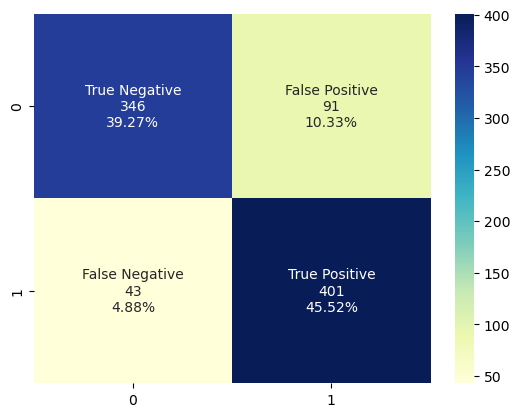

In [204]:
print("Checking model performance on train set:")
confusion_matrix_statsmodels(lg, X_train, y_train, threshold=0.5)

In [205]:
print("Training performance:")
model_performance_classification(lg, X_train, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.8479,0.903153,0.815041,0.856838


Checking model performance on test set:


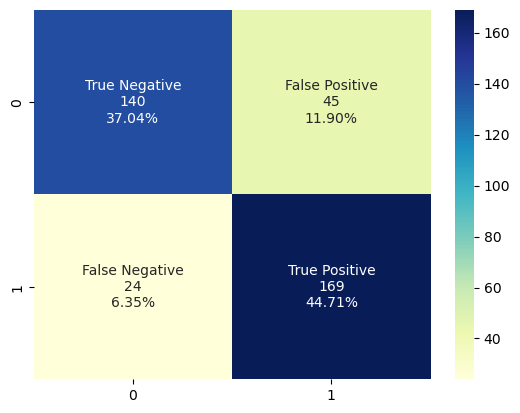

In [206]:
print("Checking model performance on test set:")
confusion_matrix_statsmodels(lg, X_test, y_test, threshold=0.5)

In [207]:
print("Test performance:")
logistic_regression_perf = model_performance_classification(lg, X_test, y_test)
logistic_regression_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.81746,0.875648,0.78972,0.830467


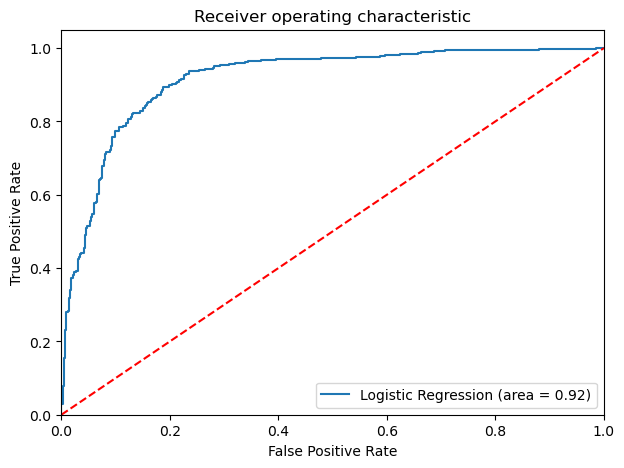

In [208]:
logit_roc_auc_train = roc_auc_score(y_train, lg.predict(X_train))
fpr, tpr, thresholds = roc_curve(y_train, lg.predict(X_train))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

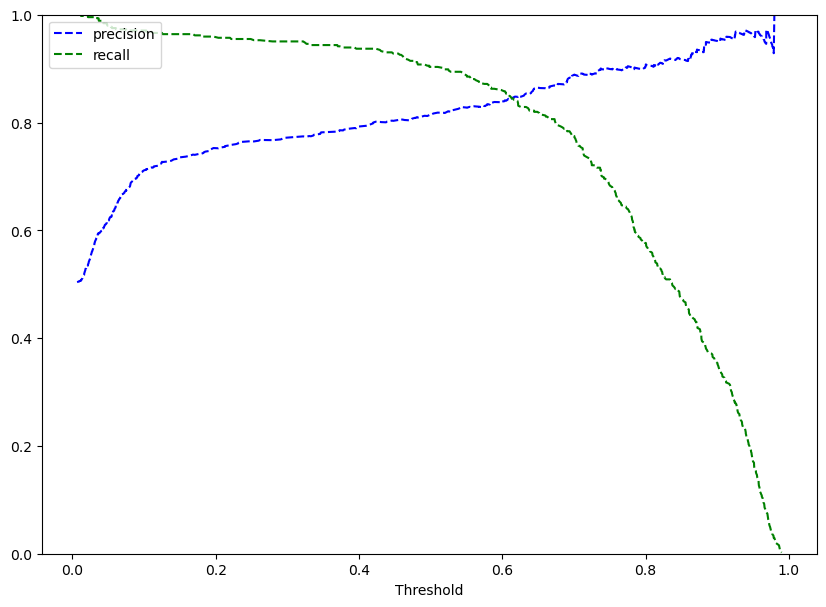

In [209]:
# Finding the balanced threshold
y_scores = lg.predict(X_train)
prec, rec, tre = precision_recall_curve(
    y_train,
    y_scores,
)


def plot_prec_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_threshold(prec, rec, tre)
plt.show()

In [210]:
print("Training performance:")
model_performance_classification(lg, X_train, y_train, threshold=0.63)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.839955,0.828829,0.849885,0.839225


## *Decision Tree Model*

In [211]:
# Decision Tree Modeling
dTree = DecisionTreeClassifier(criterion="gini", random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [212]:
dTree_model_train_perf = model_performance_classification(
    dTree, X_train, y_train
)
print("Training performance:\n", dTree_model_train_perf)
dTree_model_test_perf = model_performance_classification(dTree, X_test, y_test)
print("Testing performance:\n", dTree_model_test_perf)

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.703704  0.683938   0.721311  0.702128


In [213]:
# function to create Confusion matrix
def create_confusion_matrix(model, predictors, target, figsize=(5, 5)):
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [
        f"{v1}\n{v2}\n{v3}"
        for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
    ]
    labels = np.asarray(labels).reshape(2, 2)
    plt.figure(figsize=figsize)
    sns.heatmap(cm, annot=labels, fmt="", cmap="YlGnBu")

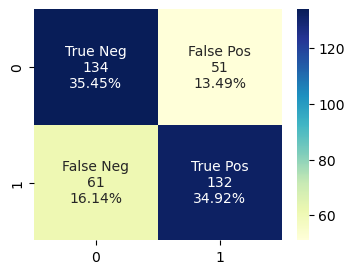

In [214]:
# Creating confusion matrix
create_confusion_matrix(dTree, X_test, y_test, figsize=(4, 3))

In [215]:
feature_names = list(X.columns)
print(feature_names)

['const', 'Age', 'Gender_Male', 'Gender_Queer', 'Self_Employed_Yes', 'Family_History_Yes', 'Work_Interfere_Often', 'Work_Interfere_Rarely', 'Work_Interfere_Sometimes', 'Employee_Count_Company_25-Jun', 'Employee_Count_Company_26-100', 'Employee_Count_Company_5-Jan', 'Employee_Count_Company_500-1000', 'Employee_Count_Company_More than 1000', 'Remote_Work_Yes', 'Tech_Company_Yes', 'Benefits_No', 'Benefits_Yes', 'Care_Options_Not sure', 'Care_Options_Yes', 'Wellness_Program_No', 'Wellness_Program_Yes', 'Seek_Help_No', 'Seek_Help_Yes', 'Anonymity_No', 'Anonymity_Yes', 'Medical_Leave_Somewhat difficult', 'Medical_Leave_Somewhat easy', 'Medical_Leave_Very difficult', 'Medical_Leave_Very easy', 'Mental_Health_Consequence_No', 'Mental_Health_Consequence_Yes', 'Physical_Health_Consequence_No', 'Physical_Health_Consequence_Yes', 'Coworkers_Reach_Some of them', 'Coworkers_Reach_Yes', 'Supervisor_Reach_Some of them', 'Supervisor_Reach_Yes', 'Mental_Health_Interview_No', 'Mental_Health_Interview_Yes

In [216]:
print(tree.export_text(dTree, feature_names=feature_names, show_weights=False))

|--- Work_Interfere_Sometimes <= 0.50
|   |--- Work_Interfere_Often <= 0.50
|   |   |--- Work_Interfere_Rarely <= 0.50
|   |   |   |--- Benefits_Yes <= 0.50
|   |   |   |   |--- Family_History_Yes <= 0.50
|   |   |   |   |   |--- Care_Options_Yes <= 0.50
|   |   |   |   |   |   |--- Medical_Leave_Very difficult <= 0.50
|   |   |   |   |   |   |   |--- Age <= 40.50
|   |   |   |   |   |   |   |   |--- Medical_Leave_Somewhat easy <= 0.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- Medical_Leave_Somewhat easy >  0.50
|   |   |   |   |   |   |   |   |   |--- Age <= 26.50
|   |   |   |   |   |   |   |   |   |   |--- Employee_Count_Company_25-Jun <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |   |--- Employee_Count_Company_25-Jun >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- Age >  26.50
|   |   |   |   |   |   |   |   |   |   |--- cl

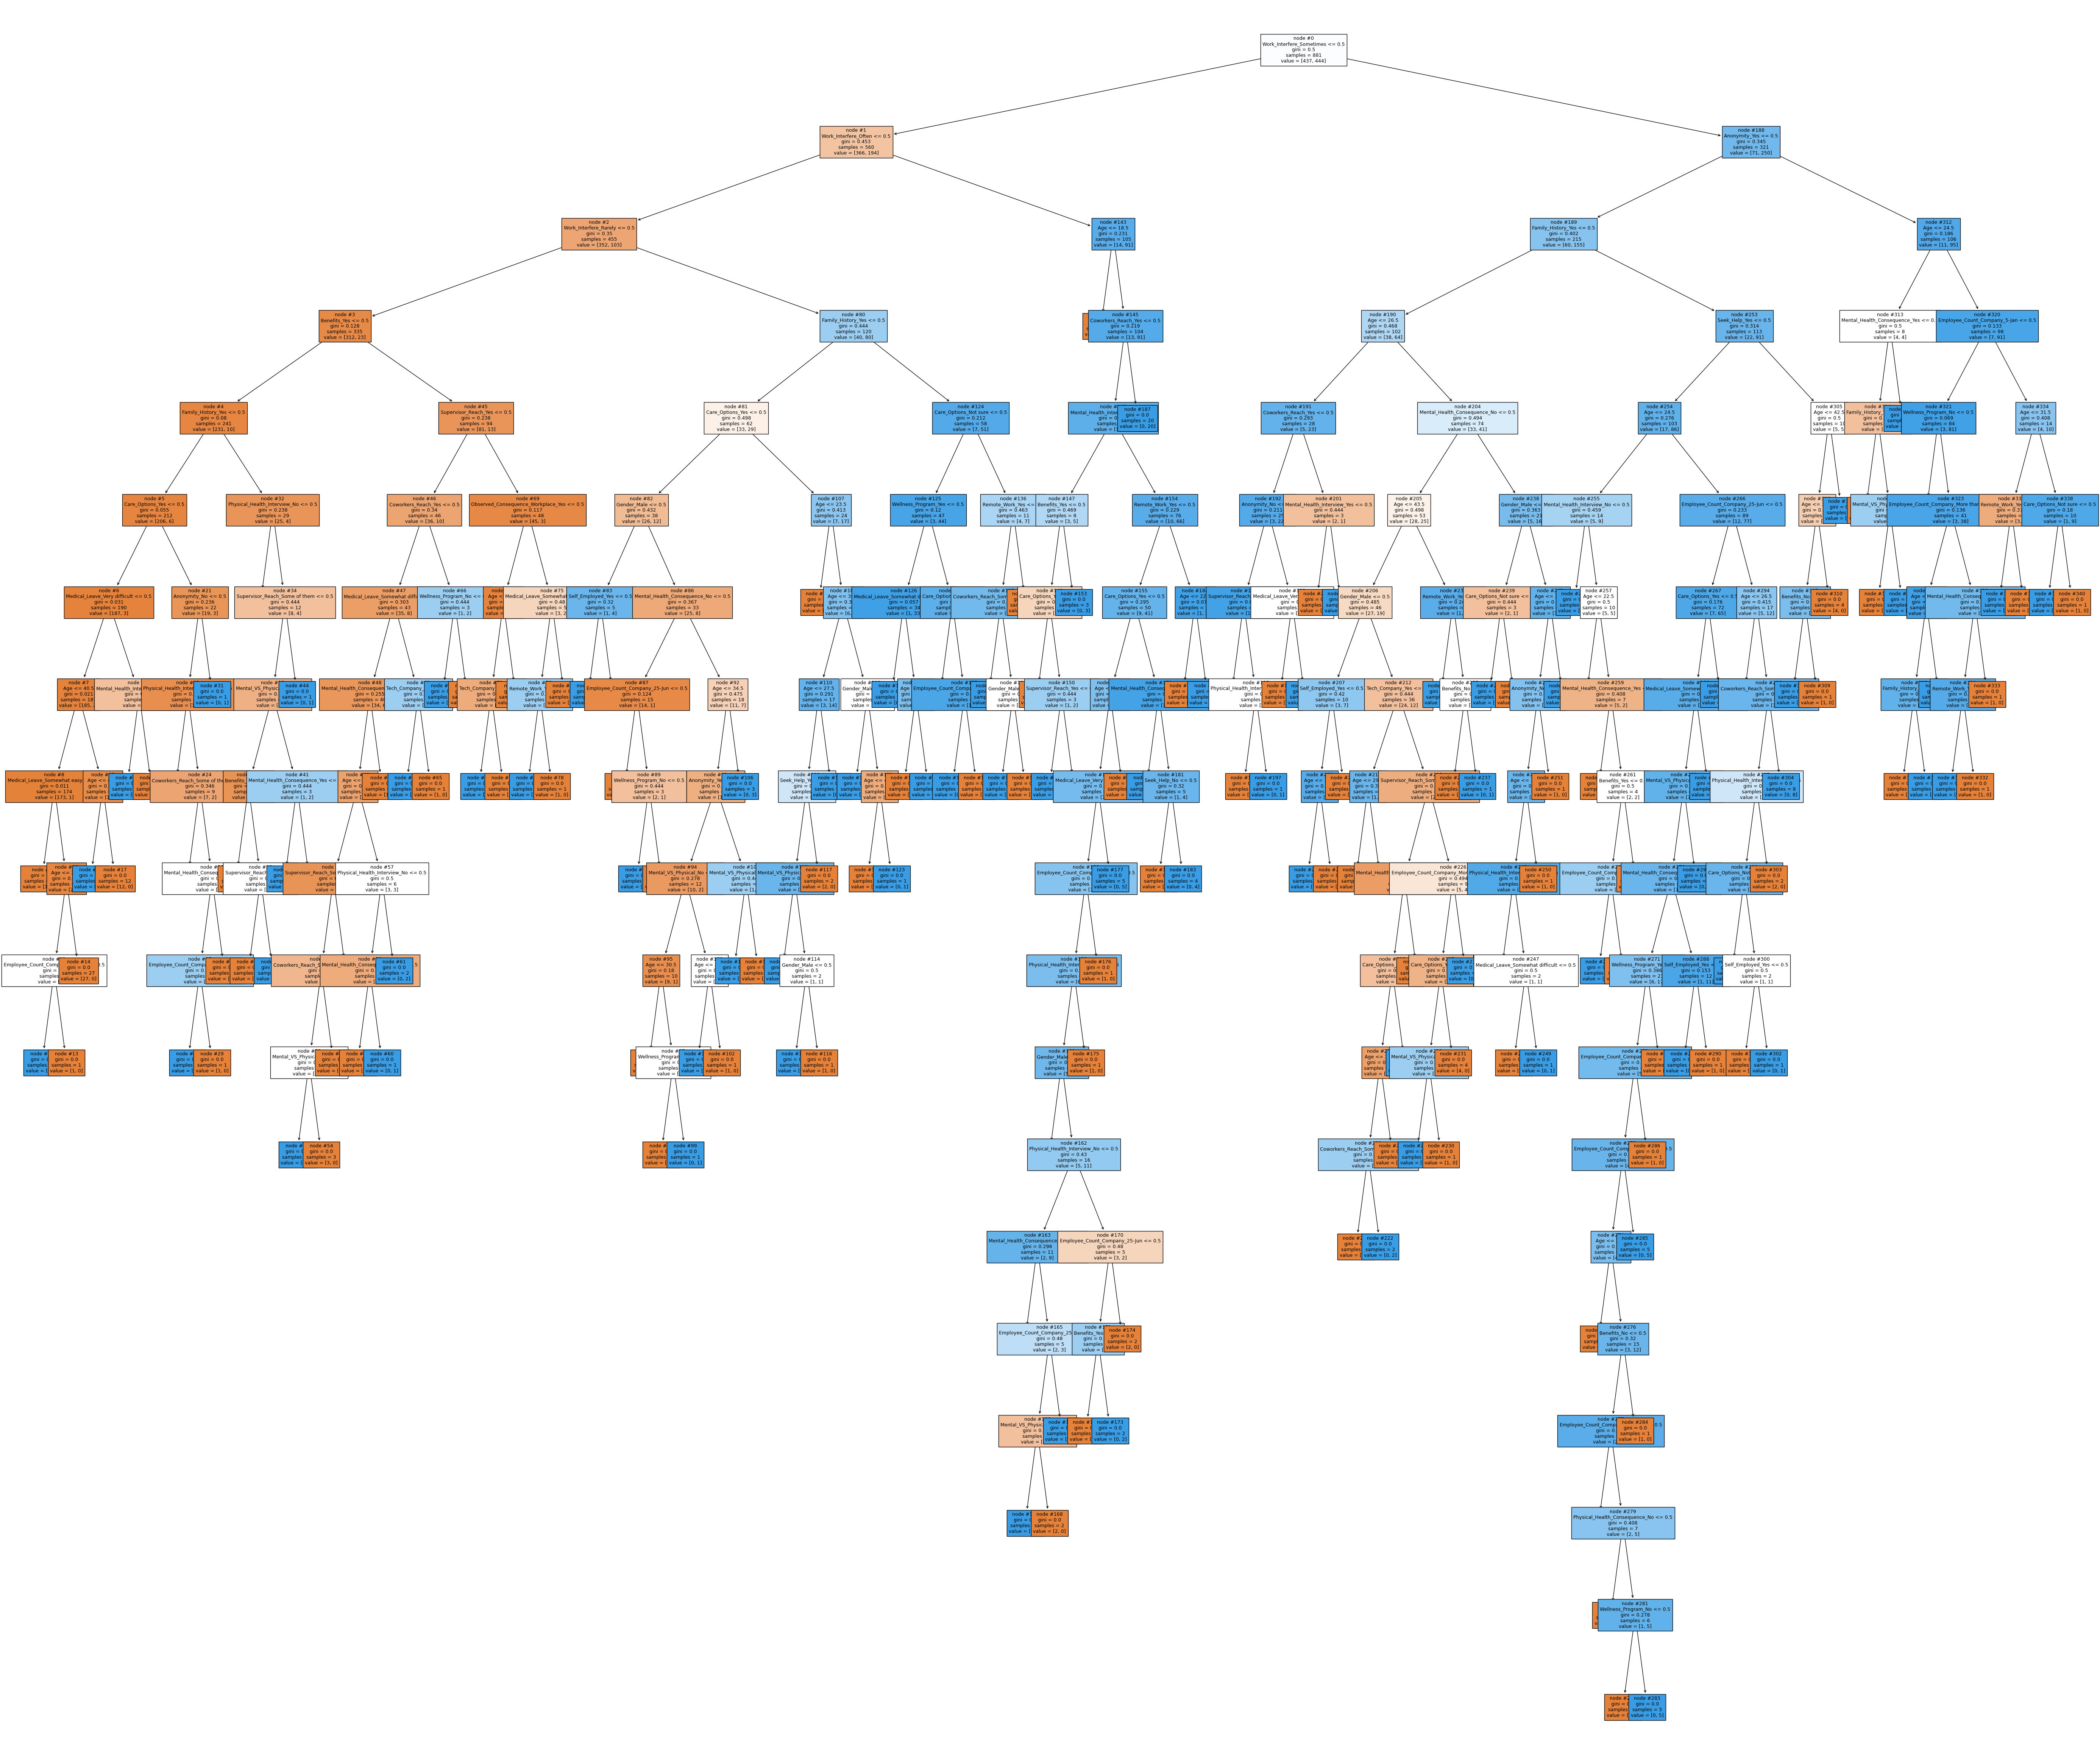

In [217]:
plt.figure(figsize=(70, 60))
tree.plot_tree( dTree, feature_names=feature_names, filled=True, fontsize=9, node_ids=True,)
plt.show()

In [218]:
# Printing feature importances
print(
    pd.DataFrame(
        dTree.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                            Imp
Work_Interfere_Sometimes               0.173211
Work_Interfere_Often                   0.158811
Work_Interfere_Rarely                  0.143464
Age                                    0.110071
Family_History_Yes                     0.038951
Care_Options_Yes                       0.029369
Gender_Male                            0.026201
Mental_VS_Physical_No                  0.018345
Mental_Health_Consequence_No           0.018287
Remote_Work_Yes                        0.018078
Physical_Health_Interview_No           0.016754
Self_Employed_Yes                      0.015627
Mental_Health_Consequence_Yes          0.015412
Coworkers_Reach_Some of them           0.013910
Anonymity_Yes                          0.012630
Wellness_Program_No                    0.012618
Tech_Company_Yes                       0.012174
Care_Options_Not sure                  0.012114
Employee_Count_Company_25-Jun          0.010745
Benefits_No                            0

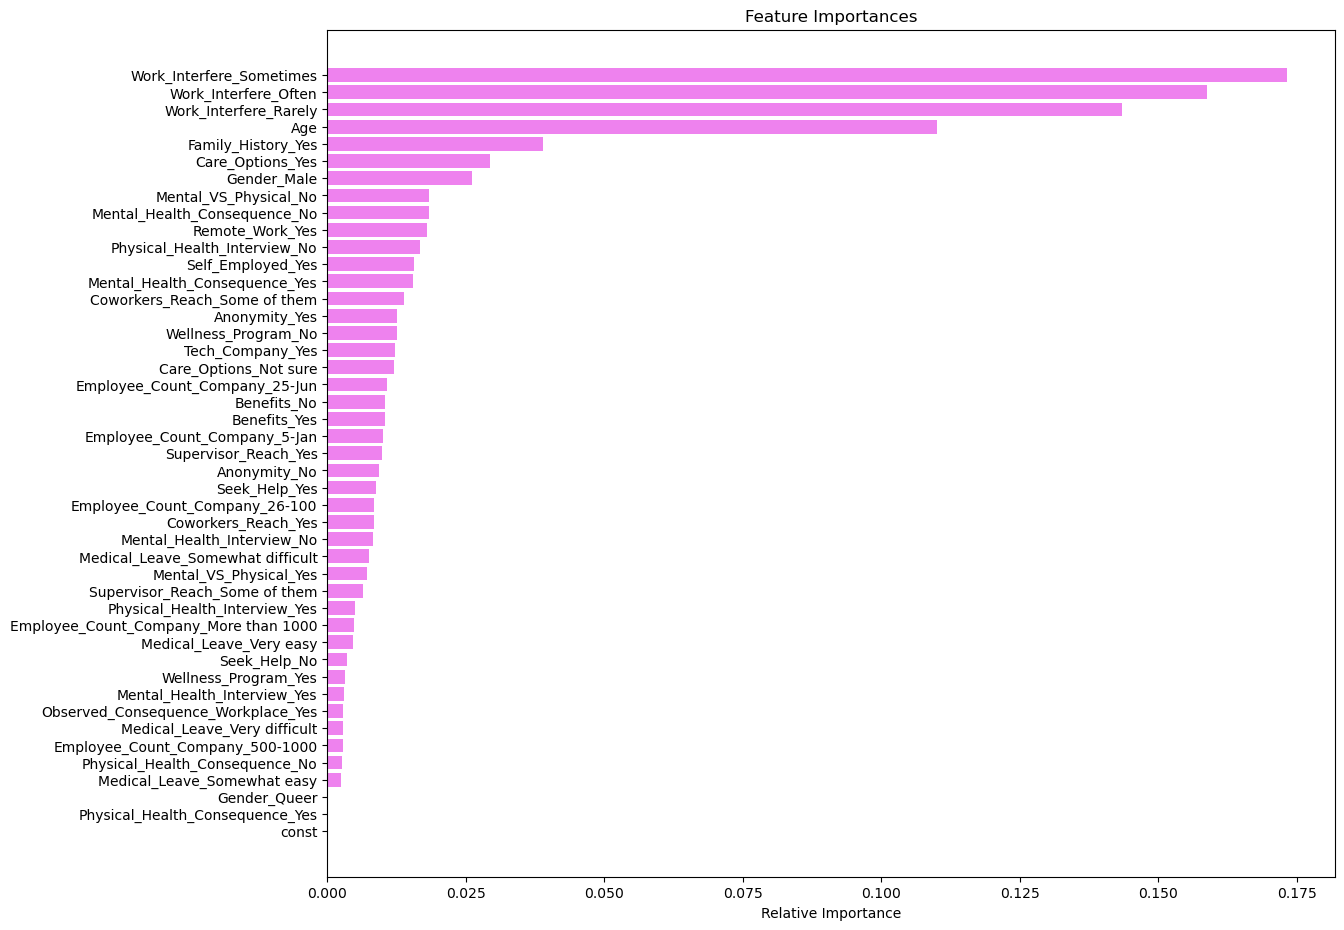

In [219]:
# Loading feature importance in a graph to get a better understanding
importances = dTree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(13, 11))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [220]:
new_respondent = pd.DataFrame([{
    'const': 1,                                 
    'Age': 27,                                      
    'Gender_Male': 0,                              
    'Gender_Queer': 0,                            
    'Self_Employed_Yes': 0,                      
    'Family_History_Yes': 1,                     
    'Work_Interfere_Often': 0,                     
    'Work_Interfere_Rarely': 0,                    
    'Work_Interfere_Sometimes': 1,            
    'Employee_Count_Company_25-Jun': 0,          
    'Employee_Count_Company_26-100': 1,             
    'Employee_Count_Company_500-1000': 0,           
    'Employee_Count_Company_5-Jan': 0,              
    'Employee_Count_Company_More than 1000': 0,     
    'Remote_Work_Yes': 1,                          
    'Tech_Company_Yes': 1,                        
    'Benefits_No': 0,                              
    'Benefits_Yes': 1,                            
    'Care_Options_Not sure': 0,                  
    'Care_Options_Yes': 1,                        
    'Wellness_Program_No': 1,                      
    'Wellness_Program_Yes': 0,                   
    'Seek_Help_No': 0,                          
    'Seek_Help_Yes': 1,                       
    'Anonymity_No': 0,                    
    'Anonymity_Yes': 1,                        
    'Medical_Leave_Somewhat difficult': 0,         
    'Medical_Leave_Somewhat easy': 0,             
    'Medical_Leave_Very difficult': 0,         
    'Medical_Leave_Very easy': 1,                
    'Mental_Health_Consequence_No': 0,           
    'Mental_Health_Consequence_Yes': 0,         
    'Physical_Health_Consequence_No': 0,          
    'Physical_Health_Consequence_Yes': 0,        
    'Coworkers_Reach_Some of them': 0,            
    'Coworkers_Reach_Yes': 1,                     
    'Supervisor_Reach_Some of them': 0,           
    'Supervisor_Reach_Yes': 0,                     
    'Mental_Health_Interview_No': 0,               
    'Mental_Health_Interview_Yes': 0,              
    'Physical_Health_Interview_No': 0,             
    'Physical_Health_Interview_Yes': 0,             
    'Mental_VS_Physical_No': 0,                    
    'Mental_VS_Physical_Yes': 1,                   
    'Observed_Consequence_Workplace_Yes': 0,

    
}],columns=[
    'const',                                 
    'Age',                                      
    'Gender_Male',                              
    'Gender_Queer',                           
    'Self_Employed_Yes',                      
    'Family_History_Yes',                     
    'Work_Interfere_Often',                     
    'Work_Interfere_Rarely',                    
    'Work_Interfere_Sometimes',            
    'Employee_Count_Company_25-Jun',          
    'Employee_Count_Company_26-100',             
    'Employee_Count_Company_500-1000',           
    'Employee_Count_Company_5-Jan',              
    'Employee_Count_Company_More than 1000',     
    'Remote_Work_Yes',                         
    'Tech_Company_Yes',                        
    'Benefits_No',                              
    'Benefits_Yes',                            
    'Care_Options_Not sure',                  
    'Care_Options_Yes',                       
    'Wellness_Program_No',                     
    'Wellness_Program_Yes',                   
    'Seek_Help_No',                          
    'Seek_Help_Yes',                       
    'Anonymity_No',                    
    'Anonymity_Yes',                        
    'Medical_Leave_Somewhat difficult',         
    'Medical_Leave_Somewhat easy',             
    'Medical_Leave_Very difficult',         
    'Medical_Leave_Very easy',                
    'Mental_Health_Consequence_No',           
    'Mental_Health_Consequence_Yes',          
    'Physical_Health_Consequence_No',          
    'Physical_Health_Consequence_Yes',        
    'Coworkers_Reach_Some of them',            
    'Coworkers_Reach_Yes',                     
    'Supervisor_Reach_Some of them',           
    'Supervisor_Reach_Yes',                     
    'Mental_Health_Interview_No',               
    'Mental_Health_Interview_Yes',              
    'Physical_Health_Interview_No',             
    'Physical_Health_Interview_Yes',             
    'Mental_VS_Physical_No',                    
    'Mental_VS_Physical_Yes',                   
    'Observed_Consequence_Workplace_Yes',],)
new_respondent

,const,Age,Gender_Male,Gender_Queer,Self_Employed_Yes,Family_History_Yes,Work_Interfere_Often,Work_Interfere_Rarely,Work_Interfere_Sometimes,Employee_Count_Company_25-Jun,Employee_Count_Company_26-100,Employee_Count_Company_500-1000,Employee_Count_Company_5-Jan,Employee_Count_Company_More than 1000,Remote_Work_Yes,Tech_Company_Yes,Benefits_No,Benefits_Yes,Care_Options_Not sure,Care_Options_Yes,Wellness_Program_No,Wellness_Program_Yes,Seek_Help_No,Seek_Help_Yes,Anonymity_No,Anonymity_Yes,Medical_Leave_Somewhat difficult,Medical_Leave_Somewhat easy,Medical_Leave_Very difficult,Medical_Leave_Very easy,Mental_Health_Consequence_No,Mental_Health_Consequence_Yes,Physical_Health_Consequence_No,Physical_Health_Consequence_Yes,Coworkers_Reach_Some of them,Coworkers_Reach_Yes,Supervisor_Reach_Some of them,Supervisor_Reach_Yes,Mental_Health_Interview_No,Mental_Health_Interview_Yes,Physical_Health_Interview_No,Physical_Health_Interview_Yes,Mental_VS_Physical_No,Mental_VS_Physical_Yes,Observed_Consequence_Workplace_Yes
0,1,27,0,0,0,1,0,0,1,0,1,0,0,0,1,1,0,1,0,1,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [225]:
predictionlg = lg.predict(new_respondent)
print('Prediction:', round(predictionlg[0]))

Prediction: 1


In [226]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        logistic_regression_perf.T,
        dTree_model_test_perf.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression",
    "Decision Tree",
   
]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Logistic Regression,Decision Tree
Accuracy,0.817460,0.703704
Recall,0.875648,0.683938
Precision,0.789720,0.721311
F1,0.830467,0.702128


## *Random Forest*

In [227]:
forest = RandomForestClassifier(criterion="gini", random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [228]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7936507936507936


In [229]:
forest_model_train_perf = model_performance_classification(
    forest, X_train, y_train
)
print("Training performance:\n", forest_model_train_perf)
forest_model_test_perf = model_performance_classification(forest, X_test, y_test)
print("Testing performance:\n", forest_model_test_perf)

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.793651  0.854922   0.767442  0.808824


In [230]:
print(forest.score(X_test,y_test))
#print(forest.score(X_train, y_train))

0.7936507936507936


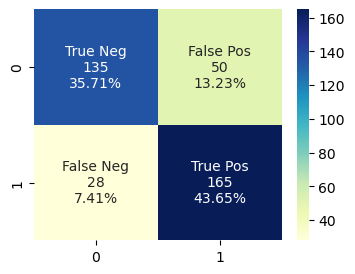

In [231]:
# function to create Confusion matrix for Random forest
def create_confusion_matrix(model, predictors, target, figsize=(5, 5)):
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    group_names = ["True Neg", "False Pos", "False Neg", "True Pos"]
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [
        f"{v1}\n{v2}\n{v3}"
        for v1, v2, v3 in zip(group_names, group_counts, group_percentages)
    ]
    labels = np.asarray(labels).reshape(2, 2)
    plt.figure(figsize=figsize)
    sns.heatmap(cm, annot=labels, fmt="", cmap="YlGnBu")
    # Creating confusion matrix
create_confusion_matrix(forest, X_test, y_test, figsize=(4, 3))
    

135 correctly classified as not mentally ill, 50 wrongly classified as not mentally ill
28 people wrongly classified as mentally ill, 165 correctly classified as mentally ill

<Axes: xlabel='feature'>

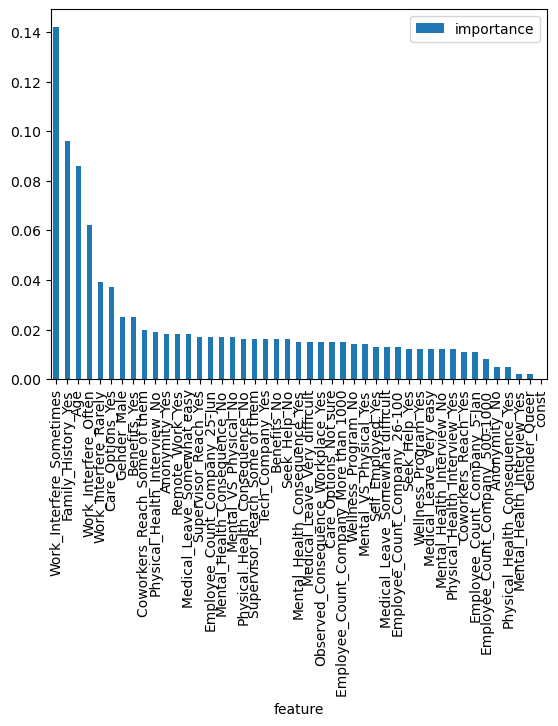

In [235]:
#Important Features
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.plot.bar()

In [236]:
# Printing feature importances
print(
    pd.DataFrame(
        forest.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                                            Imp
Work_Interfere_Sometimes               0.141605
Family_History_Yes                     0.096341
Age                                    0.085662
Work_Interfere_Often                   0.061622
Work_Interfere_Rarely                  0.038733
Care_Options_Yes                       0.037398
Benefits_Yes                           0.024898
Gender_Male                            0.024795
Coworkers_Reach_Some of them           0.020262
Physical_Health_Interview_No           0.019490
Remote_Work_Yes                        0.017989
Anonymity_Yes                          0.017661
Medical_Leave_Somewhat easy            0.017656
Mental_VS_Physical_No                  0.017451
Supervisor_Reach_Yes                   0.017144
Employee_Count_Company_25-Jun          0.016792
Mental_Health_Consequence_No           0.016538
Supervisor_Reach_Some of them          0.016026
Benefits_No                            0.015967
Seek_Help_No                           0

In [237]:
feature_names = list(X.columns)
print(feature_names)

['const', 'Age', 'Gender_Male', 'Gender_Queer', 'Self_Employed_Yes', 'Family_History_Yes', 'Work_Interfere_Often', 'Work_Interfere_Rarely', 'Work_Interfere_Sometimes', 'Employee_Count_Company_25-Jun', 'Employee_Count_Company_26-100', 'Employee_Count_Company_5-Jan', 'Employee_Count_Company_500-1000', 'Employee_Count_Company_More than 1000', 'Remote_Work_Yes', 'Tech_Company_Yes', 'Benefits_No', 'Benefits_Yes', 'Care_Options_Not sure', 'Care_Options_Yes', 'Wellness_Program_No', 'Wellness_Program_Yes', 'Seek_Help_No', 'Seek_Help_Yes', 'Anonymity_No', 'Anonymity_Yes', 'Medical_Leave_Somewhat difficult', 'Medical_Leave_Somewhat easy', 'Medical_Leave_Very difficult', 'Medical_Leave_Very easy', 'Mental_Health_Consequence_No', 'Mental_Health_Consequence_Yes', 'Physical_Health_Consequence_No', 'Physical_Health_Consequence_Yes', 'Coworkers_Reach_Some of them', 'Coworkers_Reach_Yes', 'Supervisor_Reach_Some of them', 'Supervisor_Reach_Yes', 'Mental_Health_Interview_No', 'Mental_Health_Interview_Yes

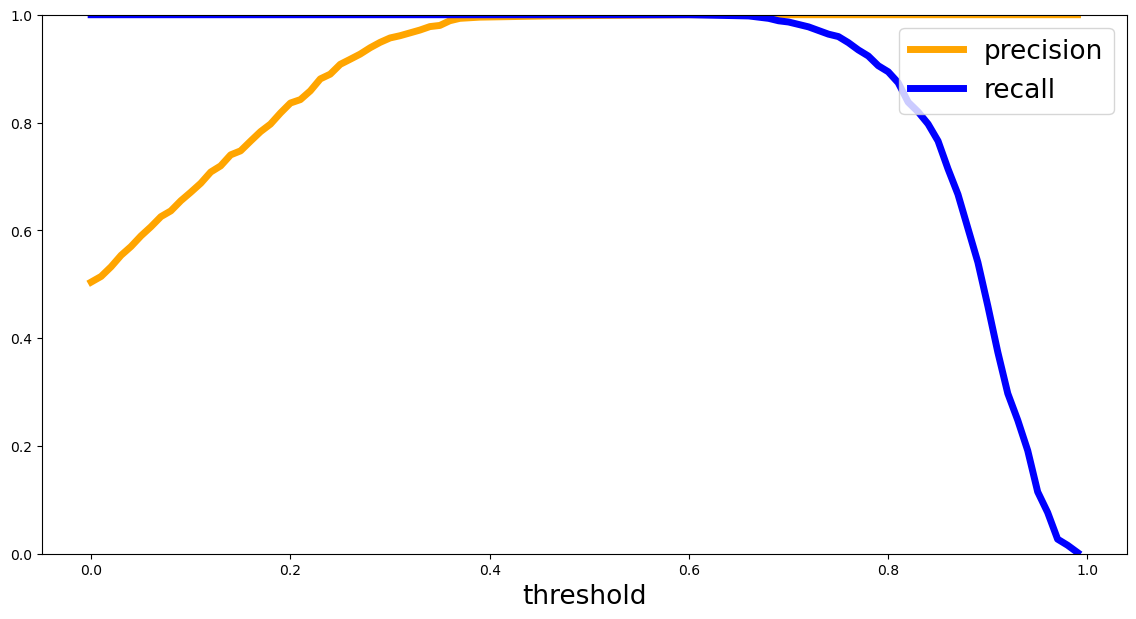

In [238]:
#Precision Recall Curve
from sklearn.metrics import precision_recall_curve

# getting the probabilities of our predictions
y_scores = forest.predict_proba(X_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(y_train, y_scores)
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "orange", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

In [239]:
from sklearn.metrics import roc_auc_score
y_scores = forest.predict_proba(X_train)
y_scores = y_scores[:,1]
r_a_score = roc_auc_score(y_train, y_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 1.0


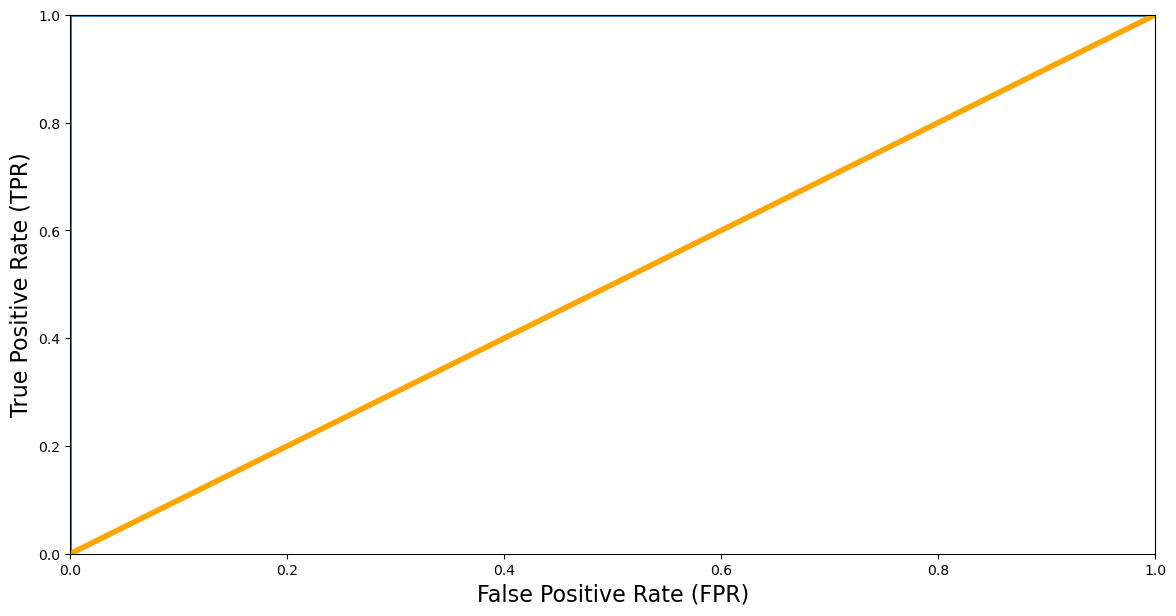

In [241]:
#ROC AUC Curve
from sklearn.metrics import roc_curve
# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_scores)
# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'orange', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

In [242]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(y_train, y_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 1.0


In [244]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        logistic_regression_perf.T,
        dTree_model_test_perf.T,
        forest_model_test_perf.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression",
    "Decision Tree",
    "Random Forest",
   
]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Logistic Regression,Decision Tree,Random Forest
Accuracy,0.817460,0.703704,0.793651
Recall,0.875648,0.683938,0.854922
Precision,0.789720,0.721311,0.767442
F1,0.830467,0.702128,0.808824
